# Домашнее задание «Кейс-стади»

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

<div class="alert alert-success">
<h2> Задание 1. vgsales.csv</h2>
</div>

Вернемся к набору данных о видеоиграх.  
Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [2]:
df = pd.read_csv('vgsales.csv')
df.columns = df.columns.str.lower()

In [3]:
df.head(4)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E


<div class="alert alert-block alert-info"> 
<h3> 1. Как критики относятся к спортивным играм? </h3>
</div>

In [4]:
critic_score_by_genre = pd.pivot_table(df, index="genre", values="critic_score", 
                                       aggfunc=['count', 'mean']).round(2)
critic_score_by_genre.columns = ['N_scores', 'mean']
critic_score_by_genre.sort_values(by='mean', ascending=False)

,N_scores,mean
genre,,
Role-Playing,737,72.65
Strategy,302,72.09
Sports,1194,71.97
Shooter,944,70.18
Fighting,409,69.22
Simulation,352,68.62
Platform,497,68.06
Racing,742,67.96
Puzzle,224,67.42


На первый взгляд критики высоко оценивают спортивные игры, жанр Sports входит в top3 по их оценкам.<br>
Протестируем статистически гипотезу, что спортивные игры оцениваются лучше, чем все прочие жанры в целом:<br>

H0: Оценки критиков у игр жанра Sports такие же как у прочих жанров или ниже.<br>
H1: Оценки критиков у игр жанра Sports выше оценок прочих жанров.<br>
Пороговый уровень статистической значимости: 5%

In [5]:
A = df.query("genre == 'Sports' and critic_score > 0").critic_score
B = df.query("genre != 'Sports' and critic_score > 0").critic_score


pvalue = 5.905856541602205e-16
Отвергаем нулевую гипотезу.
Оценки критиков у игр жанра Sports выше оценок прочих жанров.


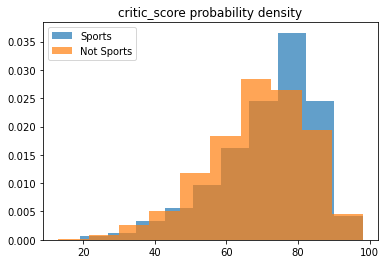

In [6]:
alpha = 0.05
pvalue = stats.ttest_ind(A, B, equal_var=False, alternative='greater').pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
    print("Оценки критиков у игр жанра Sports выше оценок прочих жанров.")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A, alpha=0.7, label='Sports', density=True);
plt.hist(B, alpha=0.7, label='Not Sports', density=True);
plt.title('critic_score probability density');
plt.legend(loc='upper left');

<div class="alert alert-block alert-info"> 
<h3> 2. Критикам нравятся больше игры на PC или на PS4? </h3>
</div>

In [7]:
A = df.query("platform == 'PC' and critic_score > 0").critic_score
B = df.query("platform == 'PS4' and critic_score > 0").critic_score

In [8]:
print(f'avg.critic_score for PC games = {A.mean()}\navg.critic_score for PS4 games = {B.mean()}')

avg.critic_score for PC games = 75.92867132867133
avg.critic_score for PS4 games = 72.09126984126983


H0: Оценки критиков у игр для платформы PC такие же как для платформы PS4 или ниже.<br>
H1: Оценки критиков у игр для платформы PC выше оценок игр платформы PS4.<br>
Пороговый уровень статистической значимости: 5%


pvalue = 1.0336245786417395e-05
Отвергаем нулевую гипотезу.
Оценки критиков у игр для платформы PC выше оценок игр платформы PS4.


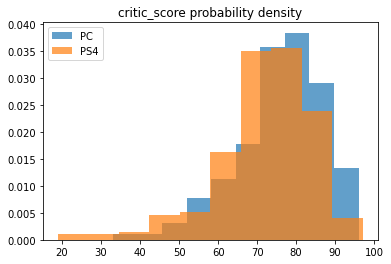

In [9]:
alpha = 0.05
pvalue = stats.ttest_ind(A, B, equal_var=False, alternative='greater').pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
    print("Оценки критиков у игр для платформы PC выше оценок игр платформы PS4.")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A, alpha=0.7, label='PC', density=True);
plt.hist(B, alpha=0.7, label='PS4', density=True);
plt.title('critic_score probability density');
plt.legend(loc='upper left');

<div class="alert alert-block alert-info"> 
<h3> 3. Критикам больше нравятся стрелялки или стратегии? </h3>
</div>

In [10]:
A = df.query("genre == 'Strategy' and critic_score > 0").critic_score
B = df.query("genre == 'Shooter' and critic_score > 0").critic_score

In [11]:
print(f'avg.critic_score for Strategy games = {A.mean()}\navg.critic_score for Shooter games = {B.mean()}')

avg.critic_score for Strategy games = 72.08609271523179
avg.critic_score for Shooter games = 70.18114406779661


H0: Оценки критиков у игр жанра Strategy такие же как у жанра Shooter или ниже.<br>
H1: Оценки критиков у игр жанра Strategy выше оценок жанра Shooter.<br>
Пороговый уровень статистической значимости: 5%


pvalue = 0.010969494761152412
Отвергаем нулевую гипотезу.
Оценки критиков у игр жанра Strategy выше оценок жанра Shooter.


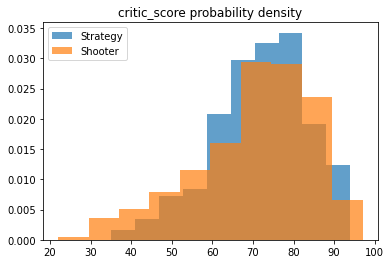

In [12]:
alpha = 0.05
pvalue = stats.ttest_ind(A, B, equal_var=False, alternative='greater').pvalue
print(f'\npvalue = {pvalue}')
if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
    print("Оценки критиков у игр жанра Strategy выше оценок жанра Shooter.")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
plt.hist(A, alpha=0.7, label='Strategy', density=True);
plt.hist(B, alpha=0.7, label='Shooter', density=True);
plt.title('critic_score probability density');
plt.legend(loc='upper left');

<div class="alert alert-success">
<h2> Задание 2. spam.csv</h2>
</div>

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений по признаку спама.<br>
Для этого:

1) Привидите весь текст к нижнему регистру  
2) Удалите мусорные символы  
3) Удалите стоп-слова  
4) Привидите все слова к нормальной форме  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)<br> 

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [13]:
df = pd.read_csv('spam.csv')
df.columns = df.columns.str.lower()

In [14]:
df.tail(10)

,category,message
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...
5563,ham,Ard 6 like dat lor.
5564,ham,Why don't you wait 'til at least wednesday to ...
5565,ham,Huh y lei...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [15]:
df.describe()

,category,message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


<div class="alert alert-block alert-info"> 
<h3> 1. Привидите весь текст к нижнему регистру </h3>
</div>

In [16]:
df['processed_message'] = df.message.str.lower()

In [17]:
df.tail(5)

,category,message,processed_message
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s...","pity, * was in mood for that. so...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...
5571,ham,Rofl. Its true to its name,rofl. its true to its name


<div class="alert alert-block alert-info"> 
<h3> 2. Удалите мусорные символы </h3>
</div>

In [18]:
df.processed_message.replace(regex=True, to_replace=r"[^0-9 a-z']", value=r" ", inplace=True)

In [19]:
df.tail(5)

,category,message,processed_message
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other s...
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i'd...
5571,ham,Rofl. Its true to its name,rofl its true to its name


<div class="alert alert-block alert-info"> 
<h3> 3. Удалите стоп-слова </h3>
</div>

In [20]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))

In [21]:
df.processed_message = df.processed_message.apply(lambda x: [word for word in x.split() if word not in stopwords_set])

In [22]:
df.tail(5)

,category,message,processed_message
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, 750, poun..."
5568,ham,Will ü b going to esplanade fr home?,"[b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, i'd, interested, ..."
5571,ham,Rofl. Its true to its name,"[rofl, true, name]"


<div class="alert alert-block alert-info"> 
<h3> 4. Привидите все слова к нормальной форме </h3>
</div>

In [23]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [24]:
df.processed_message = df.processed_message.apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word) for word in x]))

In [25]:
df.tail(5)

,category,message,processed_message
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,Will ü b going to esplanade fr home?,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like i'd interested buying ...
5571,ham,Rofl. Its true to its name,rofl true name


<div class="alert alert-block alert-info"> 
<h3> 5. Преобразуйте все сообщения в вектора TF-IDF </h3>
</div>

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tfidf = TfidfVectorizer()

In [28]:
tfidf_matrix = tfidf.fit_transform(df.processed_message)

In [29]:
names = tfidf.get_feature_names()

In [30]:
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

<div class="alert alert-block alert-info"> 
<h3> 6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split </h3>
</div>

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df.category, test_size=0.30, random_state=42)

<div class="alert alert-block alert-info"> 
<h3> 7. Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных </h3>
</div>

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
lr = LogisticRegression(random_state=42).fit(X_train, y_train)

In [35]:
accuracy_score(y_test, lr.predict(X_test))

0.958732057416268

<div class="alert alert-block alert-info"> 
<h3> 8. Опишите результаты при помощи confusion_matrix </h3>
</div>

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [37]:
confusion_matrix(y_test, lr.predict(X_test))

array([[1445,    3],
       [  66,  158]], dtype=int64)

Хоть общая точность вышла неплохая - 96%, но у нас в датафрейме большой перевес в количестве обычных сообщений над спамом. В итоге для определения спама ложноотрицательных предсказаний получается значительно больше, чем ложноположительных. Если рассмотреть только спам, то точность выходит 158/(158+66) = 70%. Посмотрим на распределение предсказаний также на тепловой карте:

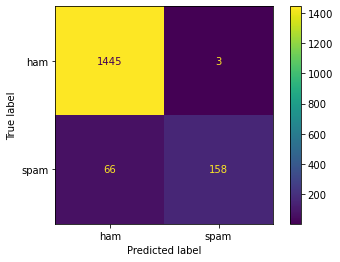

In [38]:
plot_confusion_matrix(lr, X_test, y_test);

<div class="alert alert-block alert-info"> 
<h3> 9. Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного) </h3>
</div>

In [39]:
df.loc[y_test.index].assign(pred=lr.predict(X_test)).query('category != pred')

,category,message,processed_message,pred
2952,ham,Hey now am free you can call me.,hey free call,spam
881,spam,Reminder: You have not downloaded the content ...,reminder downloaded content already paid goto ...,ham
1961,spam,Guess what! Somebody you know secretly fancies...,guess somebody know secretly fancy wanna find ...,ham
3864,spam,Oh my god! I've found your number again! I'm s...,oh god i've found number i'm glad text back xa...,ham
2575,spam,Your next amazing xxx PICSFREE1 video will be ...,next amazing xxx picsfree1 video sent enjoy on...,ham
...,...,...,...,...
4543,spam,FreeMsg Hi baby wow just got a new cam moby. W...,freemsg hi baby wow got new cam moby wanna c h...,ham
752,spam,You have an important customer service announc...,important customer service announcement premier,ham
309,spam,TheMob> Check out our newest selection of cont...,themob check newest selection content game ton...,ham
495,ham,Are you free now?can i call now?,free call,spam
